In [67]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats

In [68]:
%matplotlib inline

In [69]:
#read in the cleaned data from csv file
df = pd.read_csv('airbnbNYC.csv', encoding = 'unicode_escape')
df.sample(5)

,Unnamed: 0,city,house_title,house_type,price,owner_name,no_of_reviews,rating,occupancy,occupancy_lst,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,210.0,Manhattan,quaint village apartment for up to 6,Entire apartment,225.0,Jacqueline,69.0,4.5,"['6 guests', '1 bedroom', '2 beds', '1 bath', ...","[""['6 guests'"", "" '1 bedroom'"", "" '2 beds'"", ""...",6.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
61,61.0,Manhattan,"Cozy, Luxury, Modern Stone Chelsea Apartment",Entire apartment,127.0,Alberto,61.0,5.0,"['3 guests', '1 bedroom', '2 beds', '1 bath', ...","[""['3 guests'"", "" '1 bedroom'"", "" '2 beds'"", ""...",3.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
63,63.0,Manhattan,Cute Apartment in Hell's Kitchen,Entire apartment,200.0,Jennifer,190.0,4.5,"['3 guests', '1 bedroom', '2 beds', '1 bath', ...","[""['3 guests'"", "" '1 bedroom'"", "" '2 beds'"", ""...",3.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
airdf = df[['city','house_title','house_type','price','owner_name','no_of_reviews','rating','no_of_guest','house_size','no_of_beds','no_of_baths','house','beds','bath']]
airdf.sample(5)

,city,house_title,house_type,price,owner_name,no_of_reviews,rating,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
199,Manhattan,"Luxury Astoria 1BD apt, 20min from Manhattan",Entire apartment,130.0,Vadim,57.0,5.0,4.0,'1 bedroom','3 beds','1 bath',1.0,3.0,1.0
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,Manhattan,Sunny Room with Private Bath; Prime LES/Chinatown,Private room in apartment,110.0,Tara,94.0,5.0,3.0,'1 bedroom','1 bed','1 private bath',1.0,1.0,1.0


In [71]:
airdf.iloc[111,1]

'Ã¢Â\x9dÂ¤Ã¯Â¸Â\x8f Furnished One Bedroom with Terrace!! Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85'

In [72]:
" ".join(re.findall('[a-zA-Z]+', airdf.iloc[111,1]))

'Furnished One Bedroom with Terrace'

In [73]:
def get_alphabets(s):
    return " ".join(re.findall('[a-zA-Z]+', s))

airdf = airdf.assign(house_title = airdf.house_title.apply(get_alphabets))

airdf = airdf.assign(no_of_guest = airdf.no_of_guest.astype(int))
airdf = airdf.assign(price = airdf.price.astype(int))

airdf


TypeError: expected string or bytes-like object

In [74]:
airdf = df[['city','house_title','house_type','price','owner_name','no_of_reviews','rating','no_of_guest','house_size','no_of_beds','no_of_baths','house','beds','bath']]
airdf.sample(5)

# function to clean weird chars like Â¤Ã¯Â¸Â 
def get_alphabets(s):
    return " ".join(re.findall('[a-zA-Z]+', s))

airdf = airdf.assign(house_title = airdf.house_title.apply(get_alphabets))

airdf = airdf.assign(no_of_guest = airdf.no_of_guest.astype(int))
airdf = airdf.assign(price = airdf.price.astype(int))

TypeError: expected string or bytes-like object

In [75]:
airdf


,city,house_title,house_type,price,owner_name,no_of_reviews,rating,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
0,Manhattan,A Beautiful Brownstone Apartment,Entire apartment,91.0,Michael,279.0,5.0,4.0,'Studio','3 beds','1 bath',0.5,3.0,1.0
1,Manhattan,YOUR DREAM SUITE IN MANHATTAN,Private room in apartment,87.0,Marilyn,137.0,4.0,4.0,'1 bedroom','2 beds','1 private bath',1.0,2.0,1.0
2,Manhattan,Manhattan's Best Deal!,Entire apartment,165.0,Adrianne,272.0,4.5,6.0,'2 bedrooms','5 beds','1 bath',2.0,5.0,1.0
3,Manhattan,Spacious room near Times Square,Private room in apartment,88.0,Stephanie,118.0,4.5,4.0,'1 bedroom','1 bed','1 shared bath',1.0,1.0,1.0
4,Manhattan,Entire Apartment Steps from Times Square!!! Fo...,Entire apartment,99.0,Theresa,162.0,4.5,4.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0
5,Manhattan,Modern & Trendy 2-Bedroom 1 Bath Lower Manhattan,Entire apartment,90.0,Alex,117.0,5.0,5.0,'2 bedrooms','3 beds','1 bath',2.0,3.0,1.0
6,Manhattan,LARGE 2 Bedroom Midtown Manhattan Apartment!,Entire apartment,124.0,Ethan,4.0,5.0,4.0,'2 bedrooms','2 beds','1 bath',2.0,2.0,1.0
7,Manhattan,Massive DUPLEX 2BR & 2BATH East Village,Entire apartment,198.0,Seith,340.0,4.0,8.0,'2 bedrooms','4 beds','2 baths',2.0,4.0,2.0
8,Manhattan,Luxury Central Park Apartment close to everything,Entire apartment,199.0,Bozhena,125.0,4.5,4.0,'1 bedroom','4 beds','1 bath',1.0,4.0,1.0
9,Manhattan,GREAT AND STYLISH APARTMENT! AMAZING LOCATION!,Entire apartment,110.0,M. Alejandro,100.0,4.5,3.0,'1 bedroom','2 beds','1 bath',1.0,2.0,1.0


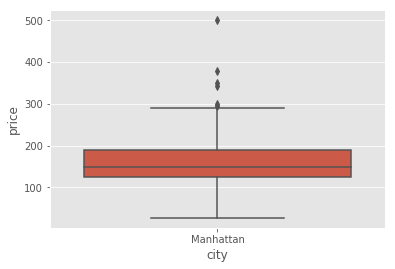

In [76]:
sns.boxplot(x = 'city', y= 'price', data=airdf)

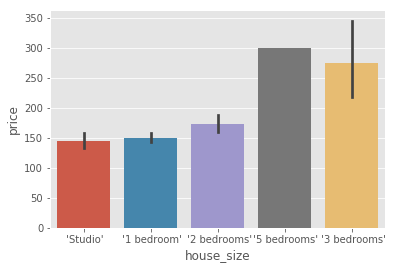

In [79]:
sns.barplot(x = 'house_size', y= 'price', data=airdf)

Text(0.5, 1.0, 'Price range analysis by Manhattan')

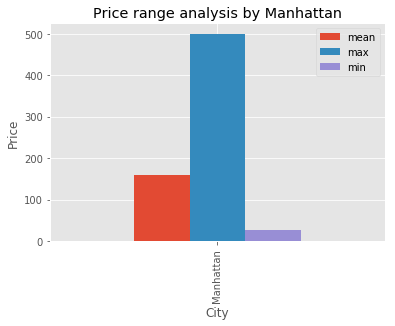

In [80]:
airCityPrice = airdf.groupby('city').agg(['mean','max','min']).price
airCityPrice.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price range analysis by Manhattan')

/Users/raqhaque/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


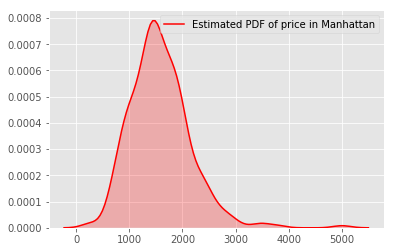

In [9]:
##Probability density function
sns.kdeplot(airdf[airdf.city == 'Manhattan'].price, shade=True, color = "red" , label='Estimated PDF of price in Manhattan')

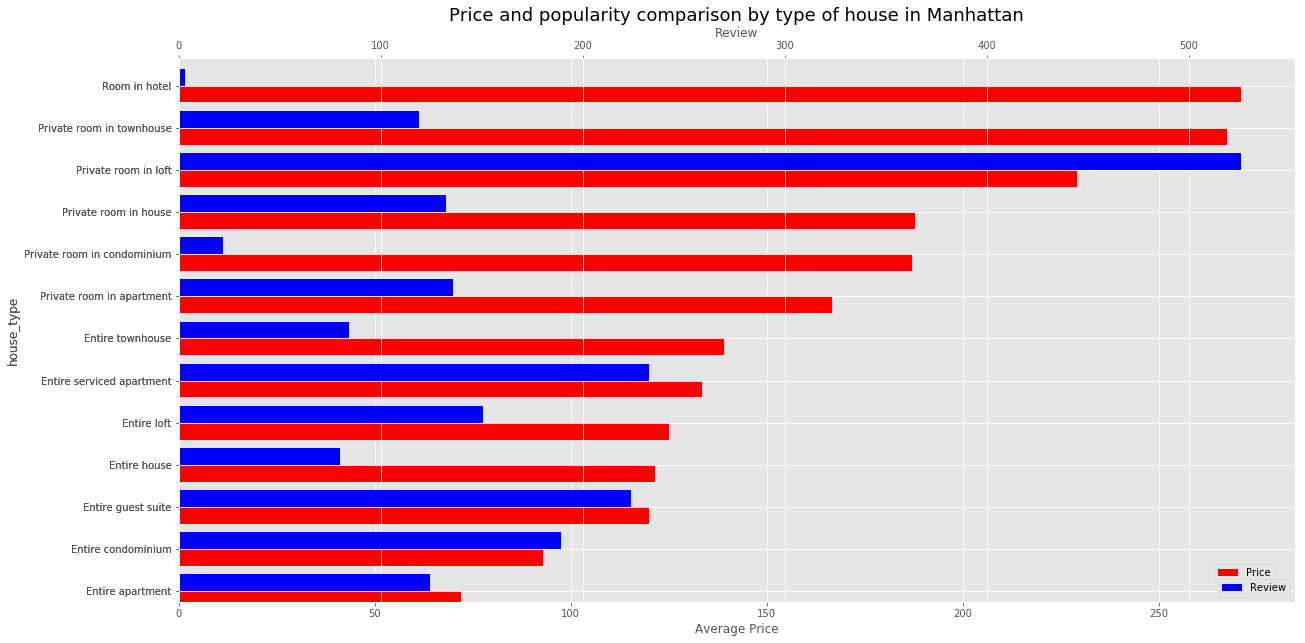

In [81]:
# Plot Price and popularity comparison by type of House in Manhattan

priceManh = airdf[airdf.city == 'Manhattan'].groupby('house_type')['price'].mean()
reviewManh = airdf[airdf.city == 'Manhattan'].groupby('house_type')['no_of_reviews'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.4

p1 = priceManh.sort_values(ascending=True).plot(kind='barh', color='red', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = reviewManh.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Review')

ax.set_xlabel('Average Price')
ax2.set_xlabel('Review')
#plt.ylabel('House Type')
plt.title('Price and popularity comparison by type of house in Manhattan', fontsize=18)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

Text(0.5, 1.0, 'How many guest can this house accomodate?')

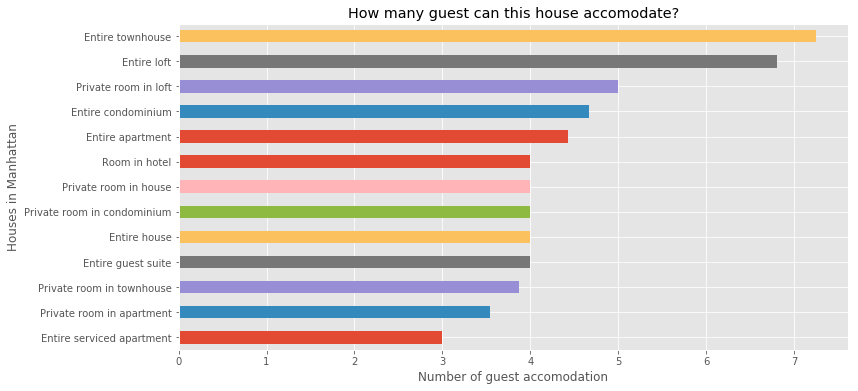

In [82]:
# type analysis in Manhattan by house size
plt.figure(figsize=(12,6))
airdf[airdf.city == 'Manhattan'].groupby('house_type')['no_of_guest'].mean().sort_values().plot(kind='barh')
plt.xlabel('Number of guest accomodation')
plt.ylabel('Houses in Manhattan')
plt.title('How many guest can this house accomodate?')

Text(0, 0.5, 'Houses in Manhattan')

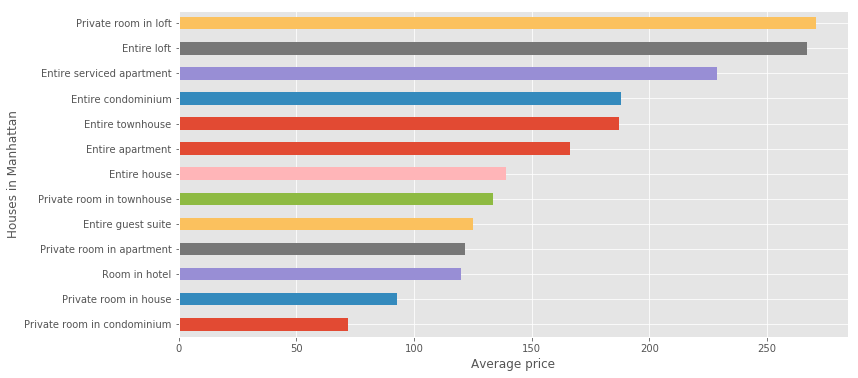

In [83]:
# test not to be used in presentation
# price analysis in Manhattan by house type

plt.figure(figsize=(12,6))
airdf[airdf.city == 'Manhattan'].groupby('house_type')['price'].mean().sort_values().plot(kind='barh')
plt.xlabel('Average price')
plt.ylabel('Houses in Manhattan')


/Users/raqhaque/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


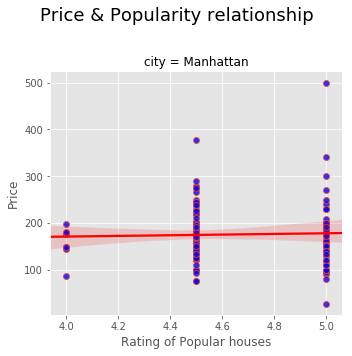

In [84]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=airdf[airdf.no_of_reviews > np.mean(airdf.no_of_reviews)], hue="city",
          line_kws={'color': 'red'},fit_reg = True,scatter_kws={'facecolors':'blue'}, col = 'city')
lmplt = lmplt.set_axis_labels("Rating of Popular houses", "Price")
fig = lmplt.fig
fig.suptitle("Price & Popularity relationship", fontsize=18)
lmplt.fig.subplots_adjust(top=.8)

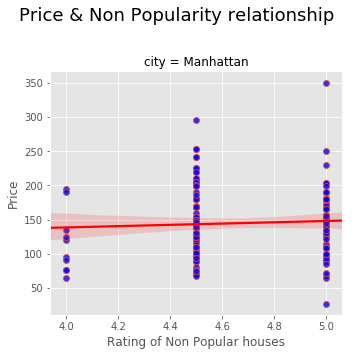

In [86]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=airdf[airdf.no_of_reviews <= np.mean(airdf.no_of_reviews)], hue="city",
          line_kws={'color': 'red'},fit_reg = True,scatter_kws={'facecolors':'blue'}, col = 'city')
lmplt = lmplt.set_axis_labels("Rating of Non Popular houses", "Price")
fig = lmplt.fig
fig.suptitle("Price & Non Popularity relationship", fontsize=18)
lmplt.fig.subplots_adjust(top=.8)

In [88]:
airdf[airdf.city=='Manhattan'].corr()

,price,no_of_reviews,rating,no_of_guest,house,beds,bath
price,1.000000,0.279812,0.025379,0.337086,0.372719,0.243942,0.057633
no_of_reviews,0.279812,1.000000,-0.057659,0.064894,0.058067,0.024947,0.032129
rating,0.025379,-0.057659,1.000000,-0.050120,-0.051072,-0.041858,0.105692
no_of_guest,0.337086,0.064894,-0.050120,1.000000,0.606750,0.511615,0.318634
house,0.372719,0.058067,-0.051072,0.606750,1.000000,0.490566,0.329886
beds,0.243942,0.024947,-0.041858,0.511615,0.490566,1.000000,0.233941
bath,0.057633,0.032129,0.105692,0.318634,0.329886,0.233941,1.000000


In [95]:
dfh = pd.read_csv('hoteldfclean.csv', encoding = 'unicode_escape')
dfh.sample(5)

,Unnamed: 0,city,hotel_name,acc_type,price,hotel_star,no_of_ratings,rating,occupancy,no_of_rooms,no_of_guests
142,238,Manhattan,"Empire Hotel, New York",HOTEL,175.0,4.0,2364.0,3.7,"1 room, 3 adults",1,3
95,152,Manhattan,"Hotel Giraffe by Library Hotel Collection, New...",HOTEL,251.0,4.0,316.0,4.8,"1 room, 3 adults",1,3
238,433,Manhattan,"3 West Club, New York",HOTEL,15.0,3.5,233.0,4.1,"1 room, 3 adults",1,3
120,195,Manhattan,"The Nolitan, New York",HOTEL,10.0,3.5,NaN,4.3,"1 room, 3 adults",1,3
257,465,Manhattan,"Hilton Garden Inn New York/Manhattan-Chelsea, ...",HOTEL,157.0,3.5,68.0,4.3,"1 room, 3 adults",1,3


In [97]:
hoteldf = dfh[['city','hotel_name','acc_type','price','hotel_star','no_of_ratings','rating','occupancy','no_of_rooms','no_of_guests']]

In [98]:
sns.boxplot(x = 'city', y= 'price', data=hoteldf

SyntaxError: unexpected EOF while parsing (<ipython-input-98-c7e6b01fb05b>, line 1)

In [ ]:
hotCityPrice = hoteldf.groupby('city').agg(['mean','max','min']).price

hotCityPrice.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price range analysis by City')


In [ ]:
hoteldf.corr()

In [ ]:
hotelNewdf = hotelNewdf[['hotelRatng','price', 'no_of_guests']]
hotelNewdf.columns = ['acc_type', 'price', 'no_of_guests']
hotelNewdf.sample(5)

In [ ]:
air_hotel = air_hotel.append(hotelNewdf)
air_hotel.sample(5)

In [ ]:
 what is better for me? hotel or airbnb based on my budget and number of guests

# Plot Price and popularity comparison by type of House in Manhattan

priceManh = air_hotel.groupby('acc_type')['price'].mean()
guestManh = air_hotel.groupby('acc_type')['no_of_guests'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = priceManh.sort_values(ascending=True).plot(kind='barh', color='red', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = guestManh.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Number of Guests')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Guests')
#plt.ylabel('House Type')
plt.title('Where should I live Hotel or Air BnB in Manhattan?', fontsize=18)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()